In [1]:
%pylab inline

import libaarhusxyz
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Resistivity modeles

A resistivity model can be read from an XYZ file, plotted and examined, or modified and saved to a new file. Plotting is done per flightline as set of cross sections.

In [2]:
model = libaarhusxyz.XYZ("synthetic_model.xyz")

In [3]:
model

synthetic_model.xyz
--------------------------------
                          0
source  synthetic_model.xyz

Soundings: 300
Flightlines: 1
Maximum layer depth: 316.227766016838
Projection: None
           x    y
min      0.0  0.0
max  14950.0  0.0
       Resistivity
count  7800.000000
mean     86.604356
std     107.801996
min      30.000000
25%      30.000000
50%      30.000000
75%      30.000000
max     300.000000

Layer data: resistivity
Layer params: layer, dep_top, dep_bot

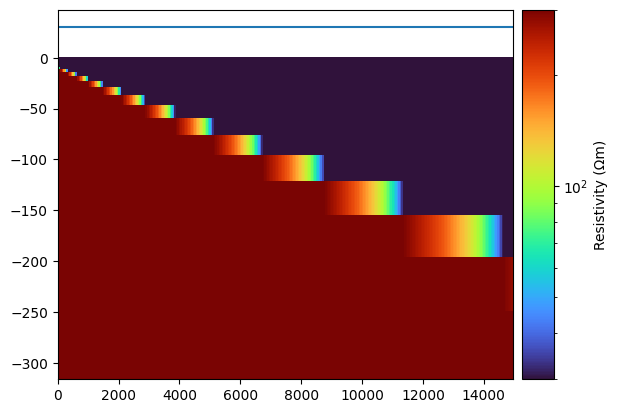

In [4]:
model.plot()

## Data access

The data making up the resistivity model is both stored in a set of Pandas DataFrames, and accessible that way.

In [5]:
model.info

{'source': 'synthetic_model.xyz'}

In [6]:
model.flightlines

,xdist,x,y,interface_depth,line_no,elevation,tx_alt
0,0,0,0,10.000000,0,0.0,30
1,50,50,0,10.635452,0,0.0,30
2,100,100,0,11.270903,0,0.0,30
3,150,150,0,11.906355,0,0.0,30
4,200,200,0,12.541806,0,0.0,30
...,...,...,...,...,...,...,...
295,14750,14750,0,197.458194,0,0.0,30
296,14800,14800,0,198.093645,0,0.0,30
297,14850,14850,0,198.729097,0,0.0,30
298,14900,14900,0,199.364548,0,0.0,30


In [7]:
model.layer_data.keys()

dict_keys(['resistivity', 'dep_top', 'dep_bot'])

In [8]:
model.layer_data["resistivity"]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.0,30.0
1,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.0,30.0
2,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.0,30.0
3,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.0,30.0
4,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.000000,300.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,291.226558,300.0,30.0
296,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,287.992772,300.0,30.0
297,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,284.758987,300.0,30.0
298,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,281.525201,300.0,30.0


# Data modification

It is permitted to both modify the dataframes above, and to assign new dataframes, as long as the indices match between all the dataframes.

Here, as an example we change the representation of resistivity to log 10 resistivity instead
of absolute values, add a new header and store the result as a new xyz file.


In [9]:
model.info["Modified by"] = "Joe Random"

In [10]:
model.layer_data["resistivity"] = np.log10(model.layer_data["resistivity"])

In [11]:
model.dump("test.xyz")

# Export 3D model for ParaView

In [12]:
model.to_vtk("test.vtk")

resistivity_variance_factor  is not in the given dataframe. this attribute will not be written to the VTK.
line_id  is not in the given dataframe. this attribute will not be written to the VTK.
invalt  is not in the given dataframe. this attribute will not be written to the VTK.
invaltstd  is not in the given dataframe. this attribute will not be written to the VTK.
deltaalt  is not in the given dataframe. this attribute will not be written to the VTK.
numdata  is not in the given dataframe. this attribute will not be written to the VTK.
resdata  is not in the given dataframe. this attribute will not be written to the VTK.
restotal  is not in the given dataframe. this attribute will not be written to the VTK.
doi_conservative  is not in the given dataframe. this attribute will not be written to the VTK.
doi_standard  is not in the given dataframe. this attribute will not be written to the VTK.


# Measurement data

Data can be read from an XYZ file, plotted and examined, or modified and saved to a new file.
Plotting is done per flightline as set of cross sections of gate values.

In [13]:
data = libaarhusxyz.XYZ("synthetic_fwd.xyz")

In [14]:
data

synthetic_fwd.xyz
--------------------------------
                                                                          0
gate times for channel 1  [3.162277660168379e-06, 5.411695265464638e-06,...
source                                                    synthetic_fwd.xyz

Soundings: 300
Flightlines: 1
Maximum layer depth: None
Projection: None
           x    y
min      0.0  0.0
max  14950.0  0.0


Layer data: dbdt_ch1gt
Layer params: layer

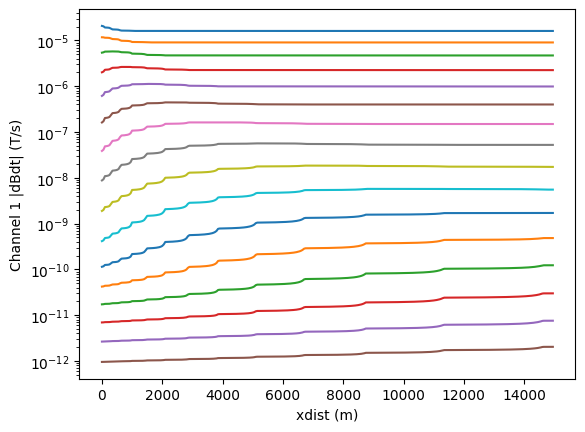

In [15]:
data.plot()

# Data access

The representation in memory of data is very similar to models:
data.info and data.flightlines have the same structure. The main difference is that the DataFrames in layer_data
do not have layers as columns, but gates.

In [16]:
data.info

{'gate times for channel 1': [3.162277660168379e-06,
  5.411695265464638e-06,
  9.261187281287937e-06,
  1.584893192461114e-05,
  2.7122725793320296e-05,
  4.641588833612782e-05,
  7.943282347242822e-05,
  0.00013593563908785255,
  0.00023263050671536262,
  0.00039810717055349735,
  0.0006812920690579615,
  0.0011659144011798323,
  0.001995262314968879,
  0.003414548873833601,
  0.005843414133735175,
  0.01],
 'source': 'synthetic_fwd.xyz'}

In [17]:
data.flightlines

,xdist,x,y,interface_depth,line_no,elevation,tx_alt
0,0,0,0,10.000000,0,0.0,30
1,50,50,0,10.635452,0,0.0,30
2,100,100,0,11.270903,0,0.0,30
3,150,150,0,11.906355,0,0.0,30
4,200,200,0,12.541806,0,0.0,30
...,...,...,...,...,...,...,...
295,14750,14750,0,197.458194,0,0.0,30
296,14800,14800,0,198.093645,0,0.0,30
297,14850,14850,0,198.729097,0,0.0,30
298,14900,14900,0,199.364548,0,0.0,30


In [18]:
data.layer_data.keys()

dict_keys(['dbdt_ch1gt'])

In [19]:
data.layer_data['dbdt_ch1gt']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.000021,-0.000012,-0.000005,-0.000002,-6.170199e-07,-1.619608e-07,-3.872673e-08,-8.783804e-09,-1.894789e-09,-4.150042e-10,-1.143491e-10,-4.217950e-11,-1.727774e-11,-6.952547e-12,-2.653889e-12,-9.546026e-13
1,-0.000020,-0.000012,-0.000006,-0.000002,-6.500865e-07,-1.721135e-07,-4.117183e-08,-9.293841e-09,-1.992713e-09,-4.319155e-10,-1.169626e-10,-4.261761e-11,-1.737605e-11,-6.978748e-12,-2.661046e-12,-9.565077e-13
2,-0.000019,-0.000011,-0.000006,-0.000002,-7.450490e-07,-2.027159e-07,-4.875569e-08,-1.089292e-08,-2.299771e-09,-4.849767e-10,-1.251384e-10,-4.395726e-11,-1.766855e-11,-7.055733e-12,-2.681966e-12,-9.620612e-13
3,-0.000019,-0.000011,-0.000006,-0.000002,-7.499683e-07,-2.044552e-07,-4.921264e-08,-1.099247e-08,-2.319185e-09,-4.883621e-10,-1.256616e-10,-4.404186e-11,-1.768666e-11,-7.060454e-12,-2.683244e-12,-9.624001e-13
4,-0.000019,-0.000011,-0.000006,-0.000002,-7.583760e-07,-2.074451e-07,-5.000101e-08,-1.116453e-08,-2.352752e-09,-4.942174e-10,-1.265666e-10,-4.418782e-11,-1.771780e-11,-7.068559e-12,-2.685437e-12,-9.629813e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.000016,-0.000009,-0.000005,-0.000002,-9.898843e-07,-4.002619e-07,-1.499122e-07,-5.245952e-08,-1.734299e-08,-5.534583e-09,-1.710490e-09,-4.839389e-10,-1.231594e-10,-2.999163e-11,-7.573920e-12,-2.037114e-12
296,-0.000016,-0.000009,-0.000005,-0.000002,-9.898843e-07,-4.002619e-07,-1.499122e-07,-5.245952e-08,-1.734294e-08,-5.534455e-09,-1.710445e-09,-4.839563e-10,-1.231761e-10,-2.999829e-11,-7.575833e-12,-2.037584e-12
297,-0.000016,-0.000009,-0.000005,-0.000002,-9.898843e-07,-4.002619e-07,-1.499122e-07,-5.245952e-08,-1.734288e-08,-5.534324e-09,-1.710398e-09,-4.839740e-10,-1.231932e-10,-3.000511e-11,-7.577789e-12,-2.038065e-12
298,-0.000016,-0.000009,-0.000005,-0.000002,-9.898843e-07,-4.002619e-07,-1.499122e-07,-5.245952e-08,-1.734282e-08,-5.534190e-09,-1.710351e-09,-4.839921e-10,-1.232107e-10,-3.001208e-11,-7.579791e-12,-2.038557e-12


In [20]:
help(libaarhusxyz.XYZ)

Help on class XYZ in module libaarhusxyz.xyz:

class XYZ(builtins.object)
 |  XYZ(*arg, **kw)
 |  
 |  Usage:
 |  
 |  xyz = XYZ(source, **kw)
 |  
 |  Where source can be a filename to parse, or an already parsed
 |  model dictionary (in the same format returned by xyz.to_dict()).
 |  
 |  Where kw can be:
 |  
 |  alcfile=filename
 |    Read column mappings from filename (a .ALC file)
 |  normalize=bool (default False)
 |    Normalize data after reading.
 |  
 |  Any additional arguments are sent to
 |  libaarhusxyz.normalizer.normalize()
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, name)
 |  
 |  __getitem__(self, line_id)
 |  
 |  __iter__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __setattr__(self, name, value)
 |      Implement setattr(self, name, value).
 |  
 |  add_defaults(self, required_columns=None)
 |  
 |  calculate_doi_layer(self)
 |  
 |  calculate_height(self)
 |  
 |  calculate_xdist(self)
 |  
 |  calculate_z(self)
 |  
 |  dump(se